数据导入

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 

#读取文件
dataPath = r'C:\Users\0.0\Desktop\Python Test\气温-变量.xlsx'#文件所在位置，u为防止路径中有中文名称，此处没有，可以省略
data = pd.read_excel(dataPath, engine = "openpyxl")#datafile是excel文件，所以用read_excel,如果是csv文件则用read_csv
examDf = DataFrame(data)
examDf.head(100)  #默认是5


绘制散点图

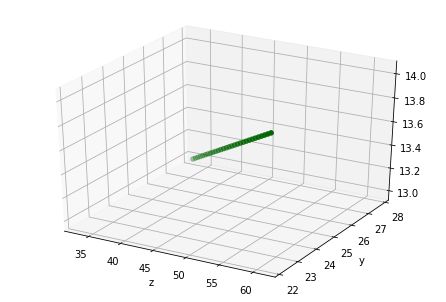

In [30]:
#绘制散点图,examDf.jt为X轴，examDf.hk为Y轴
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(examDf.海面温度,examDf.气候温度,examDf.人口数量,color = 'darkgreen',label = "Exam Data")
 
#添加图的标签（x轴，y轴）
plt.xlabel("x")#设置X轴标签
plt.ylabel("y")#设置Y轴标签
plt.xlabel("z")#设置Z轴标签
plt.show()#显示图像

梯度下降

[0.45964102 0.33800191 0.61370369]
find theta :  [-0.37622404  3.4371457   1.83894451] now_diff :  9.929572049895128e-11


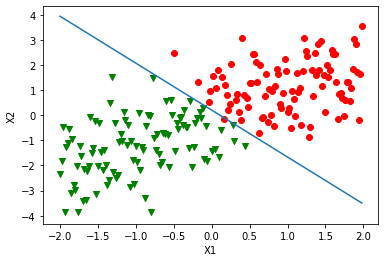

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 特征数目
n = 2
# 构造训练集
X1 = np.arange(-2., 2., 0.02)
m = len(X1)

X2 = X1 + np.random.randn(m)
# print(X1, X2)
one = np.full(m, 1.0)
Y = 1 / (np.full(m, 1.0) + np.exp(-(0.1 * np.random.randn(m)-np.full(m, 0.6) + 5*X1 + 2 * X2)))
# Y
Y = np.array([np.int(round(i)) for i in Y])


# 梯度下降法
theta = np.random.rand(n+1)
print(theta)
X = np.vstack([np.full(m, 1), X1, X2]).T
# 前一次的theta
pre = np.zeros(n + 1)
diff = 1e-10
max_loop = 10000
alpha = 0.01
lamda = 1
now_diff = 0
while max_loop > 0:
    #sum = np.zeros(n + 1)
    sum = np.sum([(1 / (1. + np.exp(- np.dot(theta, X[i]))) - Y[i])*X[i] for i in range(m)], axis=0)
    # for i in range(m):
    #    sum += (1 / (1. + np.exp(- np.dot(theta, X[i]))) - Y[i])*X[i]
    theta = theta - (alpha * sum + alpha * lamda * theta)
    #print("还差 %d 次" % max_loop, "theta = ", theta)
    now_diff = np.linalg.norm(theta - pre)
    if(now_diff <= diff):
        break
    pre = theta
    max_loop -= 1

# 打印
print("find theta : ", theta, "now_diff : ", now_diff)

# 画出平测试例子图
X_1 = np.array([(X1[i], X2[i]) for i in range(m) if Y[i] == 1])
X_0 = np.array([(X1[i], X2[i]) for i in range(m) if Y[i] == 0])
plt.scatter(X_1[:, 0], X_1[:, 1], c='r', marker='o')
plt.scatter(X_0[:, 0], X_0[:, 1], c='g', marker='v')


# 画出求得的模型图
point1 = np.arange(-2, 2, 0.02)
point2 = (theta[0] + theta[1] * point1)/(-theta[2])

plt.plot(point1, point2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()